In [41]:
import os
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

import tensorflow_datasets as tfds

In [3]:
#local_zip = "C:\\Users\\liamh\\Downloads\\79798936-GrowliFlowerL.zip"
#zip_ref = zipfile.ZipFile(local_zip,"r")
#zip_ref.extractall("C:\\Users\\liamh\\Documents\\jupyterTraining\\DataFolder")
#zip_ref.close()

In [85]:
base_dir = "C:\\Users\\liamh\\Documents\\GitHub\\GroupProject\\DataFolder\\GrowliFlowerL\\images"
base_mask_dir = "C:\\Users\\liamh\\Documents\\GitHub\\GroupProject\\DataFolder\\GrowliFlowerL\\labels"

leaves = "Train//maskLeaves"
plants = "Train//maskPlants"
stems = "Train//maskStems"
void = "Train//maskVoid"

In [86]:
train_dir = os.path.join(base_dir, "Train")
val_dir = os.path.join(base_dir,"Val")
test_dir = os.path.join(base_dir,"Test")

train_dir_mask = os.path.join(base_mask_dir,leaves)
val_dir_mask = os.path.join(base_mask_dir,leaves,"Val")
test_dir_mask = os.path.join(base_mask_dir,leaves,"Test")

In [87]:
train_dir_fnames = os.listdir(train_dir)
mask_train_dir_fnames = os.listdir(train_dir_mask)

In [88]:
train_dir

'C:\\Users\\liamh\\Documents\\GitHub\\GroupProject\\DataFolder\\GrowliFlowerL\\images\\Train'

(368, 448, 3)
(368, 448, 3)
(368, 448, 3)
(368, 448, 3)
(368, 448, 3)
(368, 448, 3)
(368, 448, 3)
(368, 448, 3)
(368, 448, 4)
(368, 448, 4)
(368, 448, 4)
(368, 448, 4)
(368, 448, 4)
(368, 448, 4)
(368, 448, 4)
(368, 448, 4)


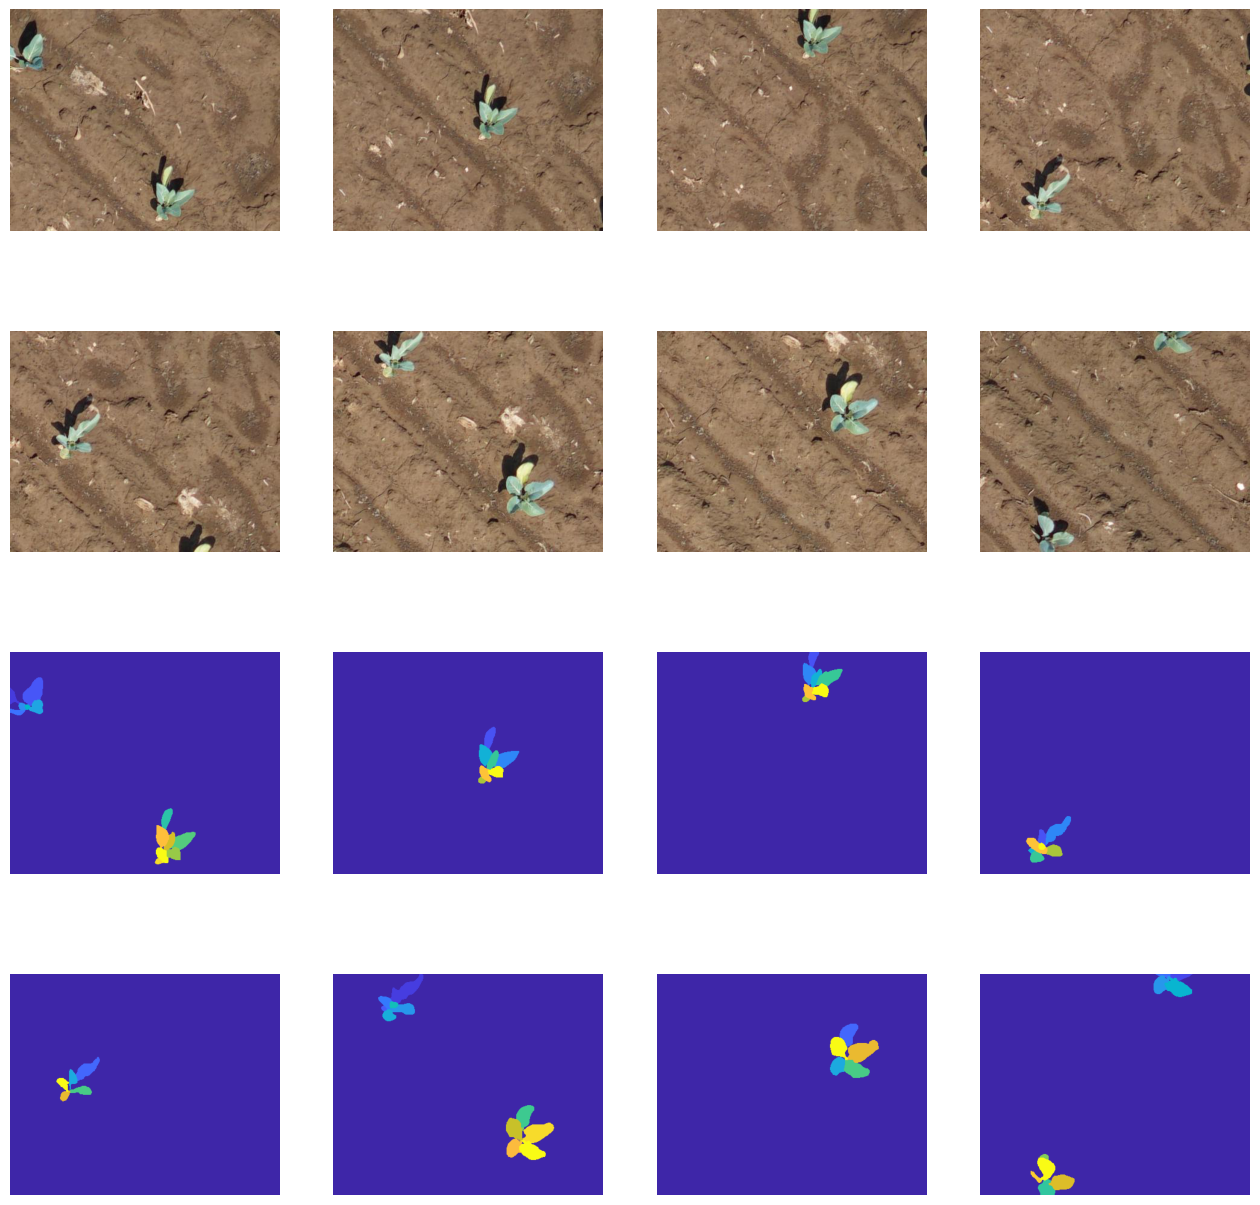

In [89]:

nrows=4
ncols=4
pic_index=0
fig =plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index=8
next_image = [os.path.join(train_dir, fname) for fname in train_dir_fnames[pic_index-8:pic_index]]
next_mask = [os.path.join(train_dir_mask, fname) for fname in mask_train_dir_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_image + next_mask):
  sp=plt.subplot(nrows,ncols, i+1)
  sp.axis('Off')
  img=mpimg.imread(img_path)
  print(img.shape)
  plt.imshow(img)

In [90]:
# C:\\Users\\liamh\\Documents\\GitHub\\GroupProject for you guys change this to your normal file project to continue

train_dir = "C:\\Users\\liamh\\Documents\\GitHub\\GroupProject\\DataFolder\\GrowliFlowerL\\Train"
test_dir = "C:\\Users\\liamh\\Documents\\GitHub\\GroupProject\\DataFolder\\GrowliFlowerL\\Test"
val_dir = "C:\\Users\\liamh\\Documents\\GitHub\\GroupProject\\DataFolder\\GrowliFlowerL\\Validation"

mask_leaves_dir_train = "C:\\Users\\liamh\\Documents\\GitHub\\GroupProject\\DataFolder\\GrowliFlowerL\\LabelTrainLeaves"
mask_stem_dir_train = "C:\\Users\\liamh\\Documents\\GitHub\\GroupProject\\DataFolder\\GrowliFlowerL\\LabelTrainStems"
mask_void_dir_train = "C:\\Users\\liamh\\Documents\\GitHub\\GroupProject\\DataFolder\\GrowliFlowerL\\LabelTrainVoid"
mask_plant_dir_train = "C:\\Users\\liamh\\Documents\\GitHub\\GroupProject\\DataFolder\\GrowliFlowerL\\LabelTrainPlants"

mask_leaves_dir_val = "C:\\Users\\liamh\\Documents\\GitHub\\GroupProject\\DataFolder\\GrowliFlowerL\\LabelValLeaves"
mask_stem_dir_val = "C:\\Users\\liamh\\Documents\\GitHub\\GroupProject\\DataFolder\\GrowliFlowerL\\LabelValStems"
mask_void_dir_val = "C:\\Users\\liamh\\Documents\\GitHub\\GroupProject\\DataFolder\\GrowliFlowerL\\LabelValVoid"
mask_plant_dir_val = "C:\\Users\\liamh\\Documents\\GitHub\\GroupProject\\DataFolder\\GrowliFlowerL\\LabelValPlants"

mask_leaves_dir_test = "C:\\Users\\liamh\\Documents\\GitHub\\GroupProject\\DataFolder\\GrowliFlowerL\\LabelTestLeaves"
mask_stem_dir_test = "C:\\Users\\liamh\\Documents\\GitHub\\GroupProject\\DataFolder\\GrowliFlowerL\\LabelTestStems"
mask_void_dir_test = "C:\\Users\\liamh\\Documents\\GitHub\\GroupProject\\DataFolder\\GrowliFlowerL\\LabelTestVoid"
mask_plant_dir_test = "C:\\Users\\liamh\\Documents\\GitHub\\GroupProject\\DataFolder\\GrowliFlowerL\\LabelTestPlants"


In [91]:
seed = 909
image_datagen = ImageDataGenerator(rescale = 1./255)

batch_size = 50
size = (368, 448, 3)

image_generator =image_datagen.flow_from_directory(train_dir,class_mode = None,seed = seed)

mask_generator = image_datagen.flow_from_directory(mask_leaves_dir,
                                                   class_mode=None, seed=seed)

train_generator = zip(image_generator, mask_generator)

Found 1542 images belonging to 1 classes.
Found 1542 images belonging to 1 classes.


{(1, 2, 'a'), 2, 3}